In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Read the UN-M49 CSV file and load it into a DataFrame
M49 = pd.read_csv('/content/UN-M49.csv')
# Create new sub-region column using intermediate where available
M49_extended = M49.copy()
M49_extended['Sub-region Name'] = M49_extended['Intermediate Region Name'].fillna(M49_extended['Sub-region Name'])
M49_extended['Sub-region Code'] = M49_extended['Intermediate Region Code'].fillna(M49_extended['Sub-region Code'])
M49_extended = M49_extended.drop(columns=['Intermediate Region Name'])
M49_extended = M49_extended.drop(columns=['Intermediate Region Code'])
M49_extended.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 13 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Global Code                              248 non-null    int64  
 1   Global Name                              248 non-null    object 
 2   Region Code                              247 non-null    float64
 3   Region Name                              247 non-null    object 
 4   Sub-region Code                          247 non-null    float64
 5   Sub-region Name                          247 non-null    object 
 6   Country or Area                          248 non-null    object 
 7   M49 Code                                 248 non-null    int64  
 8   ISO-alpha2 Code                          247 non-null    object 
 9   ISO-alpha3 Code                          248 non-null    object 
 10  Least Developed Countries (LDC)          44 non-nu

In [ ]:
# Using 'skiprows' to start reading data from the 5th row (index 4) and 'on_bad_lines' to skip bad lines.
Population = pd.read_csv('/content/API_SP.POP.TOTL_DS2_en_csv_v2_85220.csv', sep=',', on_bad_lines='skip', skiprows=4)
Population = Population.drop(['2024', 'Unnamed: 69'], axis=1)
Population = Population.drop(columns=['Indicator Name', 'Indicator Code'])
Population = Population[~Population['Country Name'].isin(['Not classified', 'West Bank and Gaza'])]
def reshape_population_data(population_df):
    # Identify year columns (assuming they are all numeric strings)
    year_columns = [col for col in population_df.columns if col.isdigit()]
    # Melt the DataFrame
    reshaped_df = pd.melt(
        population_df,
        id_vars=['Country Name', 'Country Code'],
        value_vars=year_columns,
        var_name='Year',
        value_name='Population'
    )
    # Convert 'Year' to integer
    reshaped_df['Year'] = reshaped_df['Year'].astype(int)
    return reshaped_df
Population = reshape_population_data(Population)
Population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16896 entries, 0 to 16895
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  16896 non-null  object 
 1   Country Code  16896 non-null  object 
 2   Year          16896 non-null  int64  
 3   Population    16896 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 528.1+ KB


In [ ]:
# Split into countries and non-countries
is_country = Population['Country Code'].isin(M49_extended['ISO-alpha3 Code'])
countries = Population[is_country].reset_index(drop=True)
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13696 entries, 0 to 13695
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  13696 non-null  object 
 1   Country Code  13696 non-null  object 
 2   Year          13696 non-null  int64  
 3   Population    13696 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 428.1+ KB


In [ ]:
# Step 1: Define only the necessary columns from M49_extended
cols_to_add = [
    'ISO-alpha3 Code',
    'Region Name',
    'Sub-region Name',
    'Least Developed Countries (LDC)',
    'Land Locked Developing Countries (LLDC)',
    'Small Island Developing States (SIDS)'
]
# Step 2: Merge directly using only those columns
countries = countries.merge(
    M49_extended.loc[:, cols_to_add],
    how='left',
    left_on='Country Code',
    right_on='ISO-alpha3 Code'
).drop(columns='ISO-alpha3 Code')
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13696 entries, 0 to 13695
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Country Name                             13696 non-null  object 
 1   Country Code                             13696 non-null  object 
 2   Year                                     13696 non-null  int64  
 3   Population                               13696 non-null  float64
 4   Region Name                              13696 non-null  object 
 5   Sub-region Name                          13696 non-null  object 
 6   Least Developed Countries (LDC)          2816 non-null   object 
 7   Land Locked Developing Countries (LLDC)  2048 non-null   object 
 8   Small Island Developing States (SIDS)    3072 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 963.1+ KB


In [ ]:
# 2023
countries2023 = countries[countries['Year'] == 2023]
countries2023.info()

<class 'pandas.core.frame.DataFrame'>
Index: 214 entries, 13482 to 13695
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Country Name                             214 non-null    object 
 1   Country Code                             214 non-null    object 
 2   Year                                     214 non-null    int64  
 3   Population                               214 non-null    float64
 4   Region Name                              214 non-null    object 
 5   Sub-region Name                          214 non-null    object 
 6   Least Developed Countries (LDC)          44 non-null     object 
 7   Land Locked Developing Countries (LLDC)  32 non-null     object 
 8   Small Island Developing States (SIDS)    48 non-null     object 
dtypes: float64(1), int64(1), object(7)
memory usage: 16.7+ KB


In [ ]:
# 1. Group by Region and sum population
print(countries2023.groupby('Region Name')['Population'].sum())

Region Name
Africa      1.478974e+09
Americas    1.032746e+09
Asia        4.734728e+09
Europe      7.391740e+08
Oceania     4.579106e+07
Name: Population, dtype: float64


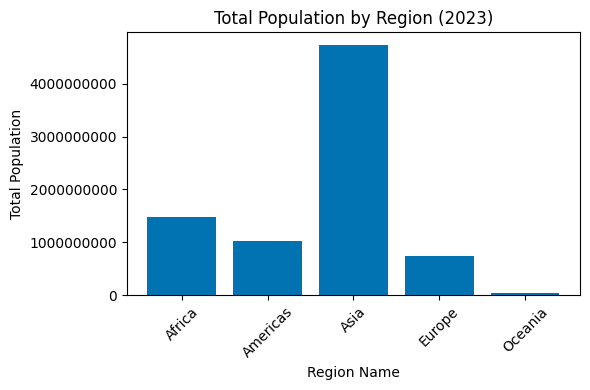

In [ ]:
# Bar chart
plt.figure(figsize=(6, 4))
plt.bar(
    countries2023.groupby('Region Name')['Population'].sum().index,
    countries2023.groupby('Region Name')['Population'].sum().values
    )
plt.title('Total Population by Region (2023)')
plt.xlabel('Region Name')
plt.ylabel('Total Population')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


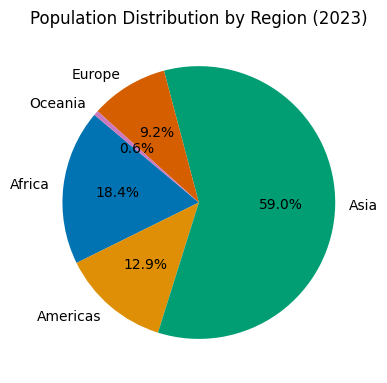

In [ ]:
# Pie chart
plt.figure(figsize=(4, 4))
plt.pie(
    countries2023.groupby('Region Name')['Population'].sum().values,
    labels=countries2023.groupby('Region Name')['Population'].sum().index,
    autopct='%1.1f%%',
    startangle=140,
    textprops={'fontsize': 10}
)
plt.title('Population Distribution by Region (2023)')
plt.tight_layout()
plt.show()

In [ ]:
# 2. Group by Sub-region and sum population
subregion_totals = countries2023.groupby(['Region Name', 'Sub-region Name'])['Population'].sum().reset_index()
subregion_totals.columns = ['Region Name', 'Sub-region Name', 'Population']
subregion_totals = subregion_totals.sort_values(
    by=['Region Name', 'Population'],
    ascending=[True, False]
).reset_index(drop=True)
print(subregion_totals)

   Region Name            Sub-region Name    Population
0       Africa             Eastern Africa  4.866457e+08
1       Africa             Western Africa  4.460392e+08
2       Africa            Northern Africa  2.679614e+08
3       Africa              Middle Africa  2.061299e+08
4       Africa            Southern Africa  7.219770e+07
5     Americas              South America  4.327173e+08
6     Americas           Northern America  3.751342e+08
7     Americas            Central America  1.816181e+08
8     Americas                  Caribbean  4.327625e+07
9         Asia              Southern Asia  2.042149e+09
10        Asia               Eastern Asia  1.625054e+09
11        Asia         South-eastern Asia  6.902457e+08
12        Asia               Western Asia  2.964439e+08
13        Asia               Central Asia  8.083640e+07
14      Europe             Eastern Europe  2.812714e+08
15      Europe             Western Europe  1.999971e+08
16      Europe            Southern Europe  1.500

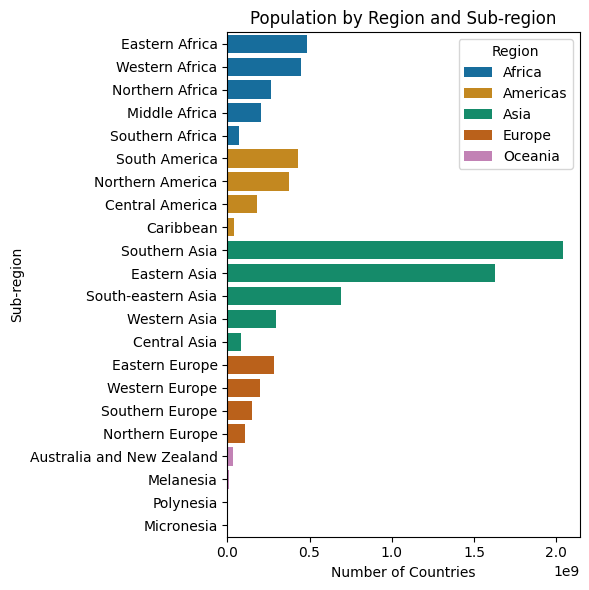

In [ ]:
# Plot
sns.set_palette("colorblind")
plt.figure(figsize=(6, 6))
sns.barplot(
    data=subregion_totals,
    x='Population',
    y='Sub-region Name',
    hue='Region Name',
    dodge=False
)
plt.title('Population by Region and Sub-region')
plt.xlabel('Number of Countries')
plt.ylabel('Sub-region')
plt.legend(title='Region')
plt.tight_layout()
plt.show()

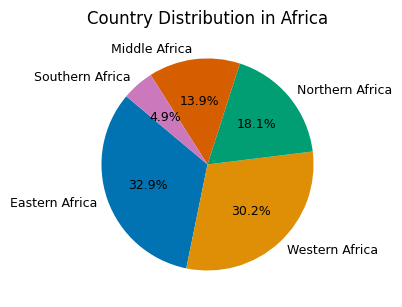

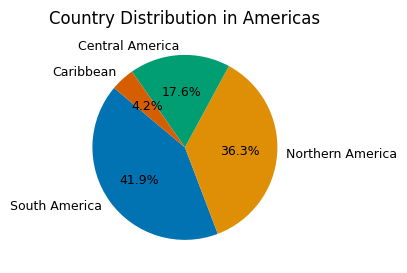

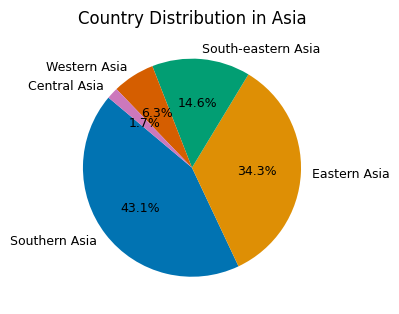

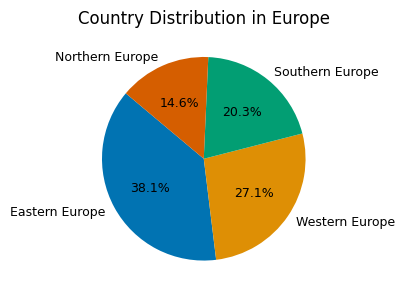

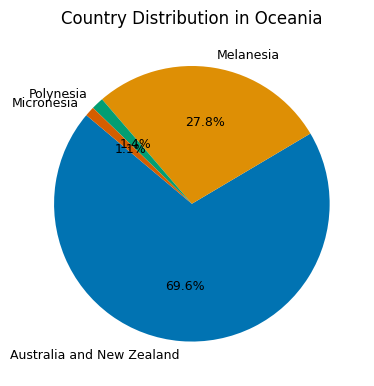

In [ ]:
# Group data by Region
grouped = subregion_totals.groupby('Region Name')
# Create a pie chart for each region
for region, data in grouped:
    plt.figure(figsize=(4, 4))
    plt.pie(
        data['Population'],
        labels=data['Sub-region Name'],
        autopct='%1.1f%%',
        startangle=140,
        textprops={'fontsize': 9}
    )
    plt.title(f'Country Distribution in {region}')
    plt.tight_layout()
    plt.show()

In [ ]:
# South America 2023
southamerica2023 = countries2023[countries2023['Sub-region Name'] == 'South America']
southamerica2023 = southamerica2023.sort_values(by='Population', ascending=False)
southamerica2023.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 13508 to 13659
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Country Name                             12 non-null     object 
 1   Country Code                             12 non-null     object 
 2   Year                                     12 non-null     int64  
 3   Population                               12 non-null     float64
 4   Region Name                              12 non-null     object 
 5   Sub-region Name                          12 non-null     object 
 6   Least Developed Countries (LDC)          0 non-null      object 
 7   Land Locked Developing Countries (LLDC)  2 non-null      object 
 8   Small Island Developing States (SIDS)    2 non-null      object 
dtypes: float64(1), int64(1), object(7)
memory usage: 960.0+ bytes


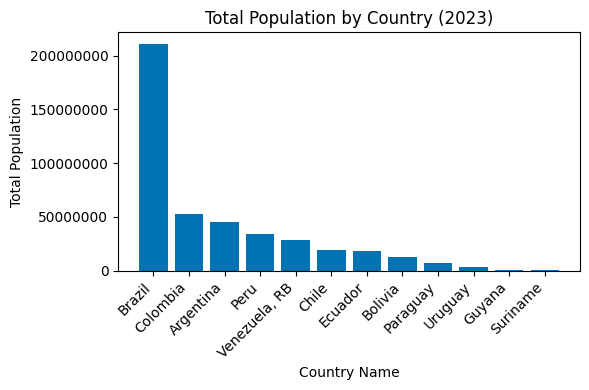

In [ ]:
plt.figure(figsize=(6, 4))
plt.bar(southamerica2023['Country Name'], southamerica2023['Population'])
plt.title('Total Population by Country (2023)')
plt.xlabel('Country Name')
plt.ylabel('Total Population')
plt.xticks(rotation=45, ha='right')
# Remove scientific notation from y-axis
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()